In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
#cycle power plant using a dataset
import pandas as pd
df = pd.read_csv("/content/Folds5x2_pp.csv")
print(df.head(20))


       AT      V       AP     RH      PE
0   14.96  41.76  1024.07  73.17  463.26
1   25.18  62.96  1020.04  59.08  444.37
2    5.11  39.40  1012.16  92.14  488.56
3   20.86  57.32  1010.24  76.64  446.48
4   10.82  37.50  1009.23  96.62  473.90
5   26.27  59.44  1012.23  58.77  443.67
6   15.89  43.96  1014.02  75.24  467.35
7    9.48  44.71  1019.12  66.43  478.42
8   14.64  45.00  1021.78  41.25  475.98
9   11.74  43.56  1015.14  70.72  477.50
10  17.99  43.72  1008.64  75.04  453.02
11  20.14  46.93  1014.66  64.22  453.99
12  24.34  73.50  1011.31  84.15  440.29
13  25.71  58.59  1012.77  61.83  451.28
14  26.19  69.34  1009.48  87.59  433.99
15  21.42  43.79  1015.76  43.08  462.19
16  18.21  45.00  1022.86  48.84  467.54
17  11.04  41.74  1022.60  77.51  477.20
18  14.45  52.75  1023.97  63.59  459.85
19  13.97  38.47  1015.15  55.28  464.30


In [3]:
print(df.shape)

(9568, 5)


In [15]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
None


In [5]:
#data Train - test
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [38]:
#data 80% train and 20%
testX_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['PE'])
y = df['PE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# data size  data sizes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (7654, 4)
X_test: (1914, 4)
y_train: (7654,)
y_test: (1914,)


In [12]:
#Mean Squared Error (MSE) find
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 20.27370599968744


In [13]:
#r2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.9301046431962188


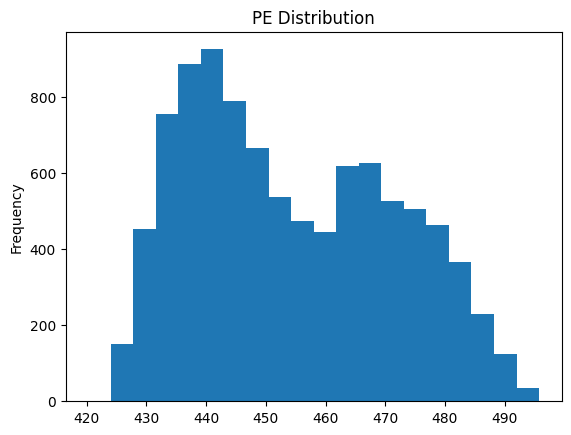

In [17]:
#EDA
df['PE'].plot(kind='hist',bins=20,title='PE Distribution')
plt.show()

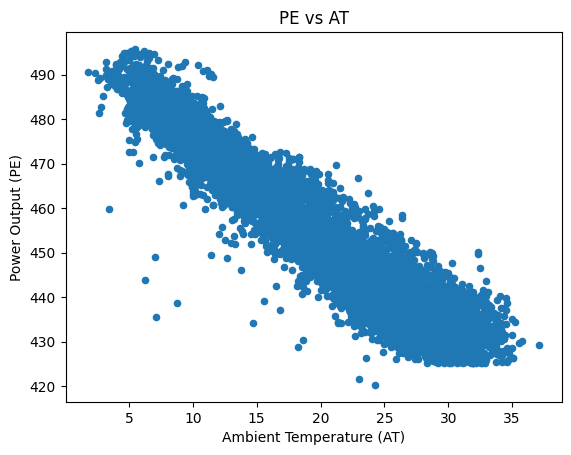

In [20]:
df.plot(kind='scatter',x='AT',y='PE',alpha=1)
plt.title('PE vs AT')
plt.xlabel('Ambient Temperature (AT)')
plt.ylabel('Power Output (PE)')
plt.show()

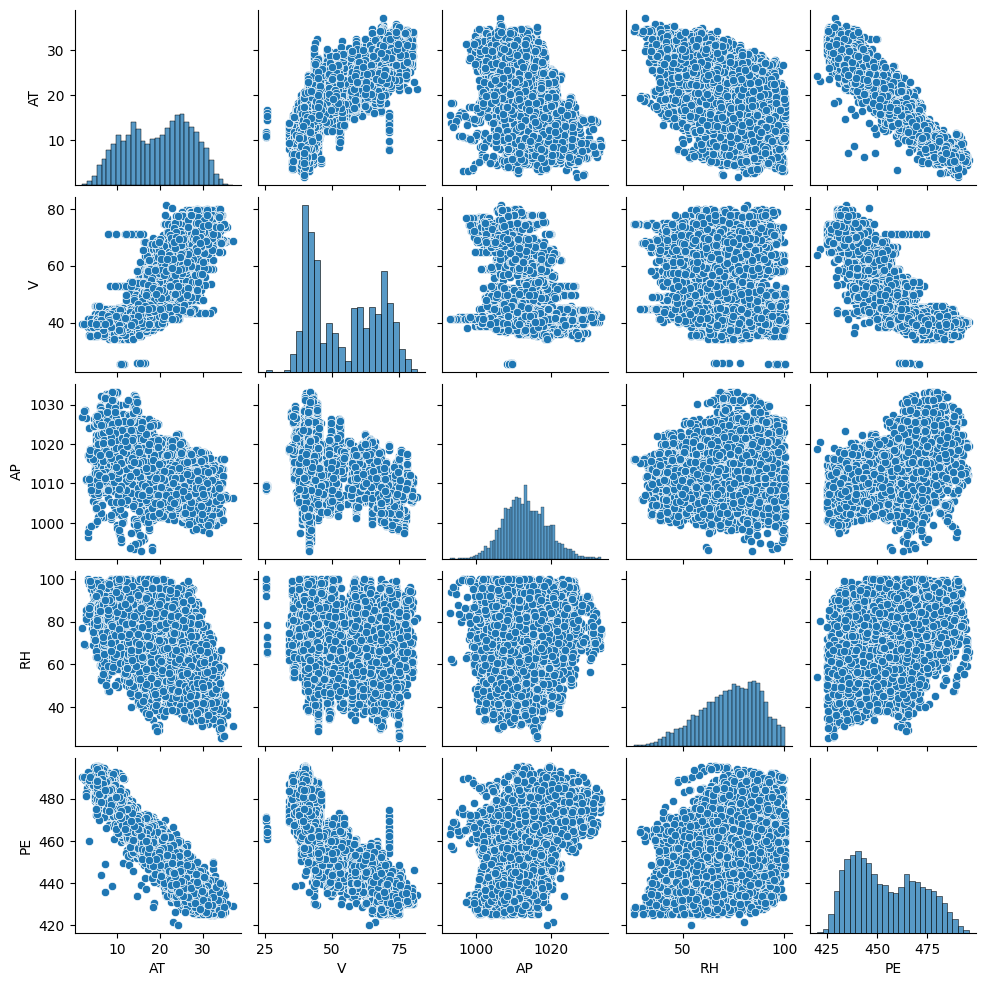

In [22]:
import seaborn as sns
sns.pairplot(data=df,height=2)

In [25]:
X = df.drop(columns=['PE'])
y = df['PE']

print("X shape:", X.shape)
print("y shape:", y.shape)

print(X.head())
print(y.head())

X shape: (9568, 4)
y shape: (9568,)
      AT      V       AP     RH
0  14.96  41.76  1024.07  73.17
1  25.18  62.96  1020.04  59.08
2   5.11  39.40  1012.16  92.14
3  20.86  57.32  1010.24  76.64
4  10.82  37.50  1009.23  96.62
0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: PE, dtype: float64


In [39]:
#MLR
X = df.drop(columns=['PE'])
y = df['PE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
mlr = LinearRegression()


mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)


coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": mlr.coef_
})

print(coefficients)

  Feature  Coefficient
0      AT    -1.985900
1       V    -0.232094
2      AP     0.062200
3      RH    -0.158118


In [41]:
#lasso alogrihm
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Train Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)


y_pred = lasso.predict(X_test)


print("Coefficients:", lasso.coef_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Coefficients: [-1.98086437 -0.23373688  0.06073755 -0.15664236]
Mean Squared Error: 20.26804585767892
R2 Score: 0.9301241570258685


In [43]:
#Ridge Alogrithm
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridge = Ridge(alpha=0)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

print("Ridge Coefficients:", ridge.coef_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))



Ridge Coefficients: [-1.98589969 -0.23209358  0.06219991 -0.15811779]
Mean Squared Error: 20.273705999687447
R2 Score: 0.9301046431962188
